# Conversion Rate Challenge


## Objectif

Optimiser des taux de conversion est une des tâches les plus importantes d'un data scientist.

C'est pourquoi, nous allons construire un modèle qui va prédire le taux de conversion de clients sur un site web et faire des recommandations à notre équipe marketing pour pouvoir augmenter notre revenu.


## Description du challenge

Nous avons récolté des données à propos d'utilisateurs du site d'une entreprise _anonyme_. Notre projet est de :

1. Créer un modèle de prédiction du taux de conversion (l'utilisateur va-t-il convertir ou non ?).

2. Trouver des recommandations à faire pour l'équipe Produit & Marketing afin qu'ils puissent améliorer ce taux de conversion.

## Données

Notre jeu de données est composé de 316 200 individus et de 6 variables : 
- _country_, pays d'où s'est connecté l'utilisateur -> Chine, Allemagne, Etats-Unis, Royaume-Uni
- _age_, âge de l'utilisateur
- __new_user__, variable dichotomique -> 0 si l'utilisateur a déjà fréquenté le site auparavant ou 1 s'il s'agit d'un nouvel utilisateur
- _source_, moyen par lequel l'utilisateur est parvenu au site -> Ads pour Advertisement, Seo pour Search Engine Optimization, Direct si l'utilisateur accède par lui-même au site
- __total_pages_visited__, nombre de pages visités lors de l'utilisation du site
- _converted_, variable cible dichotomique, 0 si l'utilisateur n'a pas converti ou 1 si l'utilisateur a converti

# DATAVIZ

## Chargement des données

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
conversion_df = pd.read_csv("conversion_data.csv")

In [38]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [39]:
conversion_df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [40]:
conversion_df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [41]:
conversion_df["converted"].value_counts()/conversion_df.shape[0]

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [42]:
conversion_df[conversion_df["converted"] == 1].shape

(10200, 6)

### Sous-échantillonnage
* La proportion d'individus ayant converti est de 3.23%, ce qui représente 10200 observations. Comme le déséquilibre est trop important, nous allons sous-échantillon pour rétablir l'équilibre.

In [43]:
nb_not_converted, nb_converted = conversion_df["converted"].value_counts()

conversion_not_converted_df = conversion_df[conversion_df["converted"] == 0]
conversion_converted_df = conversion_df[conversion_df["converted"] == 1]

conversion_not_converted_sample_df = conversion_not_converted_df.sample(nb_converted)
conversion_sample_df = pd.concat([conversion_not_converted_sample_df, conversion_converted_df], axis=0)

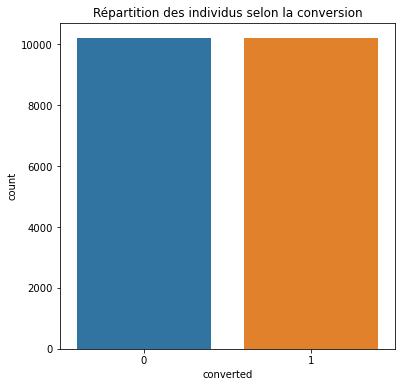

In [44]:
plt.figure(figsize=(6, 6))
sns.countplot(data=conversion_sample_df, x="converted")
plt.title("Répartition des individus selon la conversion")
plt.show()

## Analyse univariée

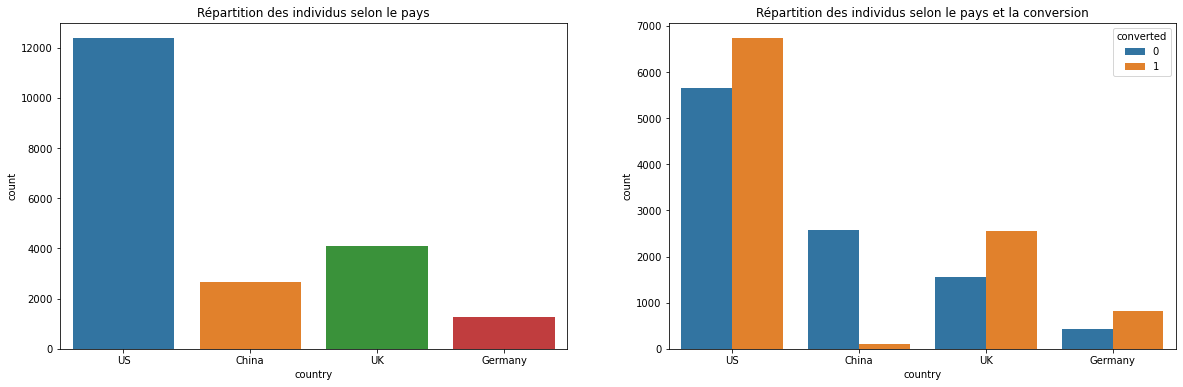

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="country")
plt.title("Répartition des individus selon le pays")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="country", hue="converted")
plt.title("Répartition des individus selon le pays et la conversion")
plt.show()

* Plus de la moitié de nos utilisateurs se trouvent aux Etats-Unis.
* Hormis la Chine, la proportion d'utilisateurs ayant converti dépasse celle des utilisateurs n'ayant pas converti.
* Bien que la Chine compte plus d'utilisateurs que l'Allemagne, les utilisateurs allemands convertissent plus de quatre fois plus que les utilisateurs chinois.

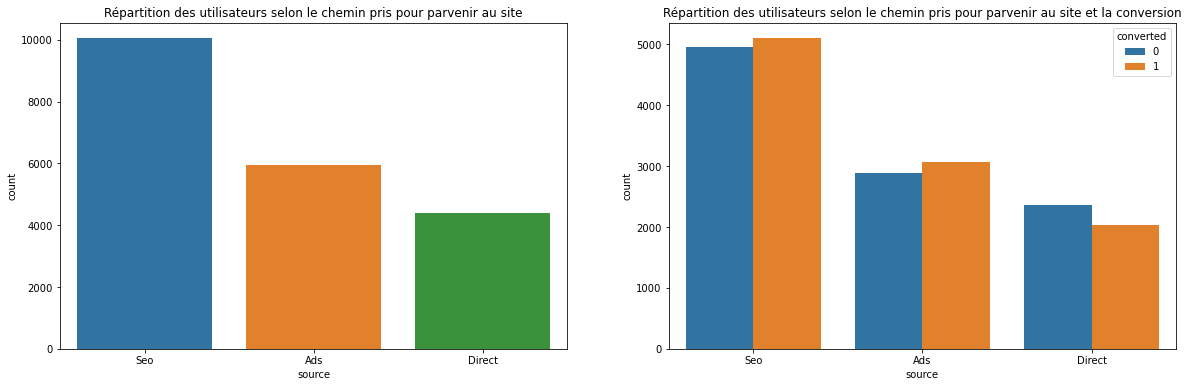

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="source")
plt.title("Répartition des utilisateurs selon le chemin pris pour parvenir au site")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="source", hue="converted")
plt.title("Répartition des utilisateurs selon le chemin pris pour parvenir au site et la conversion")
plt.show()

* Prés de 50% de nos utilisateurs sont arrivés sur le site grâce au référencement (Seo).
* Pour chaque chemin emprunté pour accéder au site, les proportions d'utilisateurs ayant converti et n'ayant pas converti sont presque les mêmes (environ 50%).

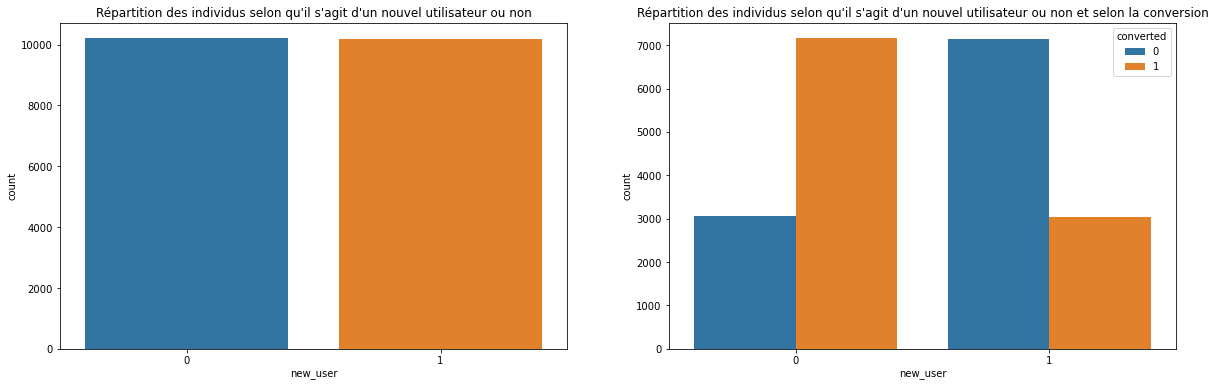

In [47]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=conversion_sample_df, x="new_user")
plt.title("Répartition des individus selon qu'il s'agit d'un nouvel utilisateur ou non")
plt.subplot(122)
sns.countplot(data=conversion_sample_df, x="new_user", hue="converted")
plt.title("Répartition des individus selon qu'il s'agit d'un nouvel utilisateur ou non et selon la conversion")
plt.show()

* Dans notre échantillon, on retrouve autant de nouveaux utilisateurs que d'utilisateurs ayant déjà visité le site auparavant.
* Les utilisateurs qui convertissent sont deux fois plus souvent des anciens utilisateurs que des nouveaux.

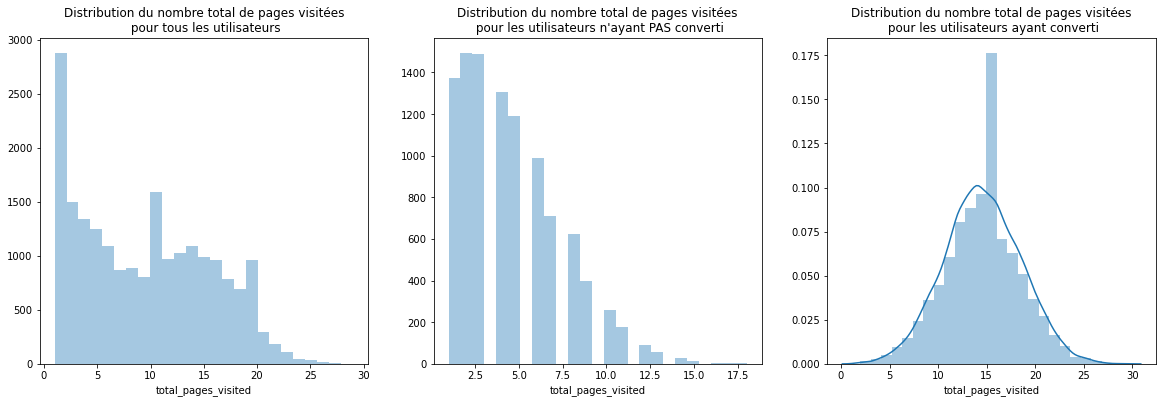

In [48]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(conversion_sample_df["total_pages_visited"], bins=25, kde=False)
plt.title("Distribution du nombre total de pages visitées\n pour tous les utilisateurs")
plt.subplot(132)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 0, "total_pages_visited"], bins=25, kde=False)
plt.title("Distribution du nombre total de pages visitées\n pour les utilisateurs n'ayant PAS converti")
plt.subplot(133)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 1, "total_pages_visited"], bins=25, kde=True)
plt.title("Distribution du nombre total de pages visitées\n pour les utilisateurs ayant converti")
plt.show()

* A mesure que le nombre de pages visités augmente, nous trouvons de moins en moins d'individus, ce qui n'est pas surprenant.
* Concernant les individus qui convertissent, nous observons une distribution assez symétrique autour d'une valeur moyenne de 15 pages. Pour cette même valeur, nous allons trouver extrêmement peu d'utilisateurs qui ne convertissent pas, la plupart d'entre eux visitent moins de 8 pages du site. 

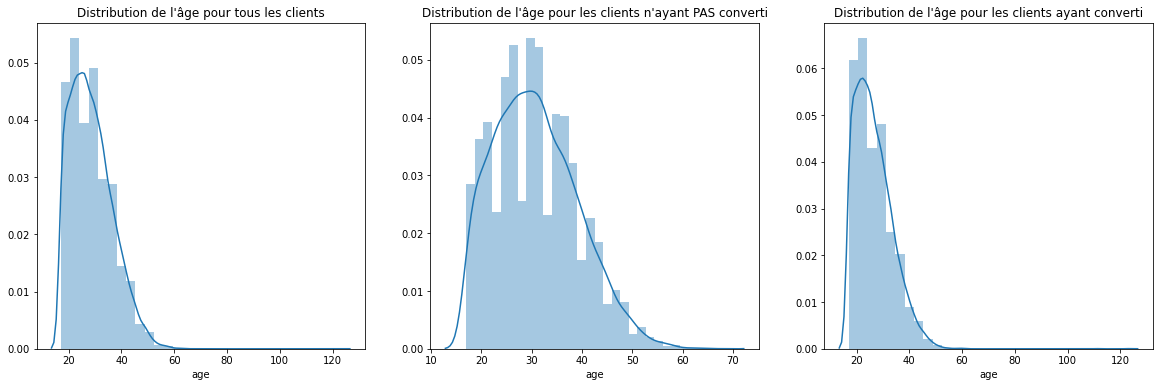

In [49]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(conversion_sample_df["age"], bins=30, kde=True)
plt.title("Distribution de l'âge pour tous les clients")
plt.subplot(132)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 0, "age"], bins=30, kde=True)
plt.title("Distribution de l'âge pour les clients n'ayant PAS converti")
plt.subplot(133)
sns.distplot(conversion_sample_df.loc[conversion_df["converted"] == 1, "age"], bins=30, kde=True)
plt.title("Distribution de l'âge pour les clients ayant converti")
plt.show()

* Une grande partie des utilisateurs se trouve dans la tranche d'âge 20-40 ans.
* En particulier, les individus entre 20 et 29 ans sont ceux qui convertissent le plus.

## Analyse bivariée

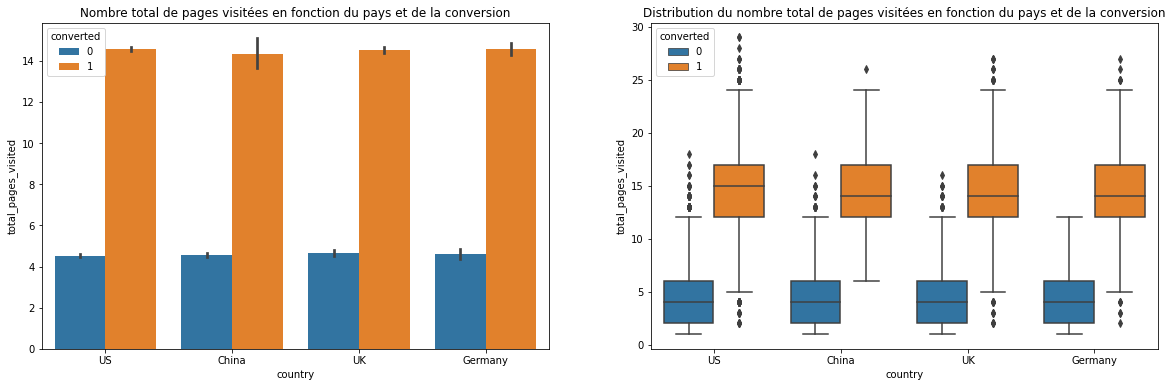

In [50]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="country", y="total_pages_visited", hue="converted")
plt.title("Nombre total de pages visitées en fonction du pays et de la conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="country", y="total_pages_visited", hue="converted")
plt.title("Distribution du nombre total de pages visitées en fonction du pays et de la conversion")
plt.show()

* En moyenne, le nombre total de pages visitées par les utilisateurs qui ne convertissent pas est de 4 tandis que ce nombre passe à 14 pour les individus qui convertissent, peu importe le pays d'où viennent les utilisateurs.
* Le pays a très peu d'influence sur le nombre de pages visités. Les distributions sont quasi-identiques pour les individus qui convertissent, même constat pour les individus ne convertissant pas.
* 50% des indivius ne convertissant pas consultent entre 2 et 6 pages, tandis que 50% des samples qui convertissent quittent le site après avoir visionné entre 12 et 17 pages. 

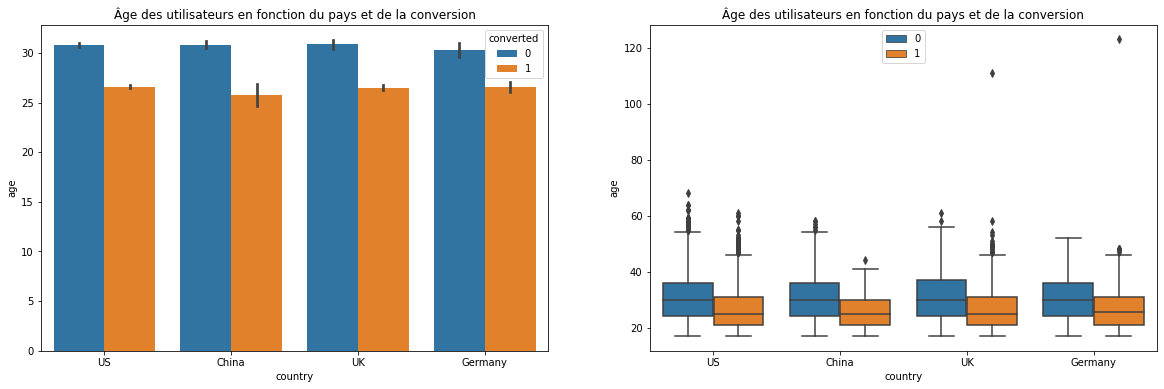

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="country", y="age", hue="converted")
plt.title("Âge des utilisateurs en fonction du pays et de la conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="country", y="age", hue="converted")
plt.title("Âge des utilisateurs en fonction du pays et de la conversion")
plt.legend(loc='upper center')
plt.show()

* Tout comme pour le nombre de pages visitées, les internautes consultant le site se répartissent sur un même intervalle d'âge, de 17 à 64 ans. Toutefois, nous observons deux individus centenaires, un britannique et un allemand : cela nous semble improbable que des personnes ayant cet âge puissent consulter le site, et encore plus improbable qu'ils aient procédé à un achat. Nous allons les retirer de notre jeu de données.
* Les utilisateurs qui convertissent ont en moyenne 25 ans et ceux quittant le site sans effectuer un achat ont en moyenne 30 ans, peu import le pays d'origine de la personne.
* Pour les quatre pays, les distributions des individus ne convertissant pas sont plus resserrées que les distributions des autres internautes. Cela confirme ce que nous avions dit lors de la lecture des histogrammes.

In [52]:
conversion_sample_df[conversion_sample_df["age"] >= 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [53]:
conversion_sample_df = conversion_sample_df[conversion_sample_df["age"] < 100]

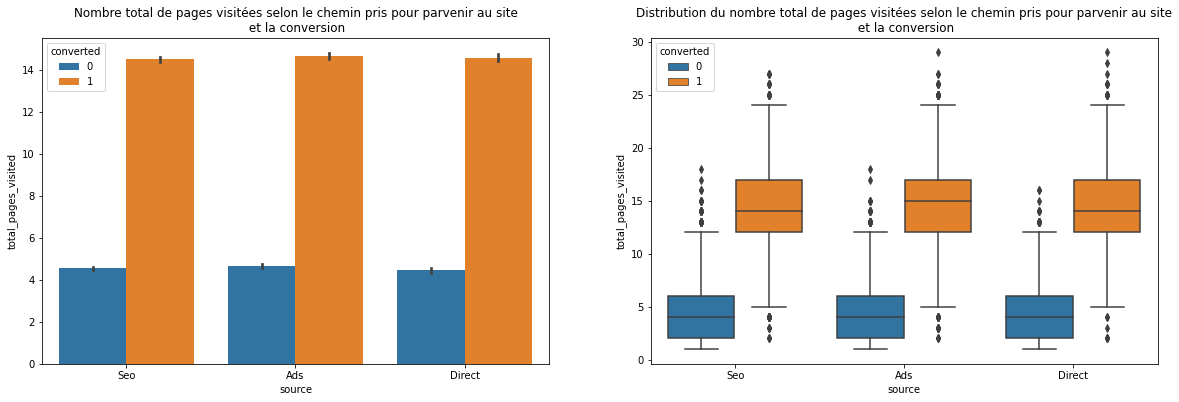

In [54]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="source", y="total_pages_visited", hue="converted")
plt.title("Nombre total de pages visitées selon le chemin pris pour parvenir au site\n et la conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="source", y="total_pages_visited", hue="converted")
plt.title("Distribution du nombre total de pages visitées selon le chemin pris pour parvenir au site\n et la conversion")
plt.show()

* Il n'y a pas d'influence du chemin pris par l'internaute pour accéder au site sur le nombre total de pages visitées.
* Que l'utilisateur accéde directement au site de lui-même, qu'il vienne après avoir été sur un moteur de recherche, ou qu'il consulte après avoir cliqué sur une annonce publicitaire, nous serions incapable de dire comment l'internaute est parvenu au site rien qu'en observant le nombre de pages visitées.

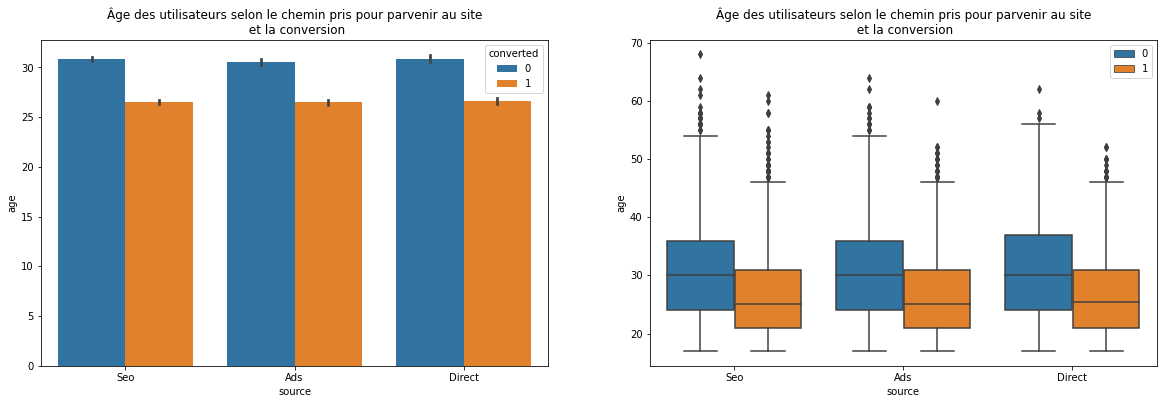

In [55]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="source", y="age", hue="converted")
plt.title("Âge des utilisateurs selon le chemin pris pour parvenir au site\n et la conversion")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="source", y="age", hue="converted")
plt.legend(loc='upper right')
plt.title("Âge des utilisateurs selon le chemin pris pour parvenir au site\n et la conversion")
plt.show()

* Le moyen qu'a emprunté l'utilisateur pour visiter le site n'a aucune influence sur l'âge. Dit autrement, nous ne pouvons deviner l'âge de la personne consultant le site en sachant seulement si elle a cliqué sur une publicité, s'il a tapé l'URL du site, ou s'il a utilisé un moteur de recherche.

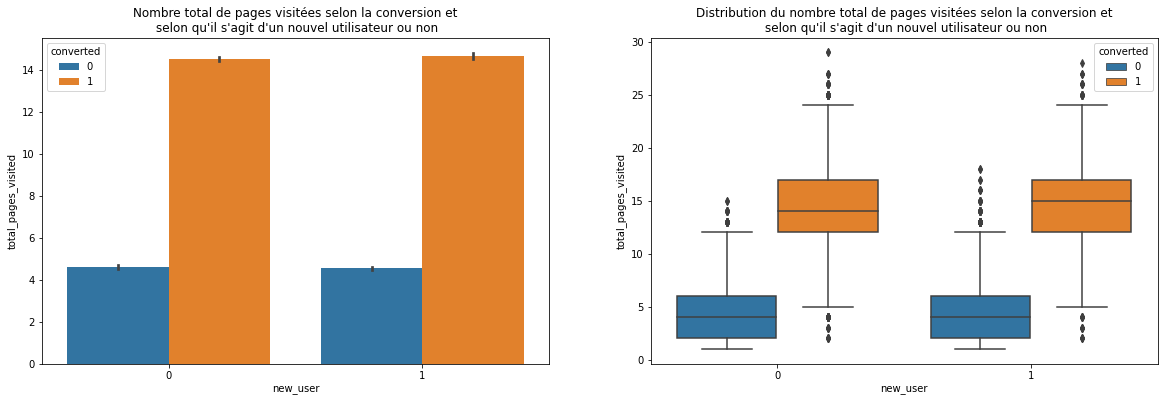

In [56]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="new_user", y="total_pages_visited", hue="converted")
plt.title("Nombre total de pages visitées selon la conversion et\n selon qu'il s'agit d'un nouvel utilisateur ou non")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="new_user", y="total_pages_visited", hue="converted")
plt.title("Distribution du nombre total de pages visitées selon la conversion et\n selon qu'il s'agit d'un nouvel utilisateur ou non")
plt.show()

* La moyenne du nombre total de pages utilisées ne change pas entre les anciens utilisateurs du site et les nouveaux utilisateurs.
* Les distributions des utilisateurs ayant converti et non converti pour les individus qui ont déjà fréquenté le site sont très similaires aux mêmes distributions pour les nouveaux utilisateurs. 

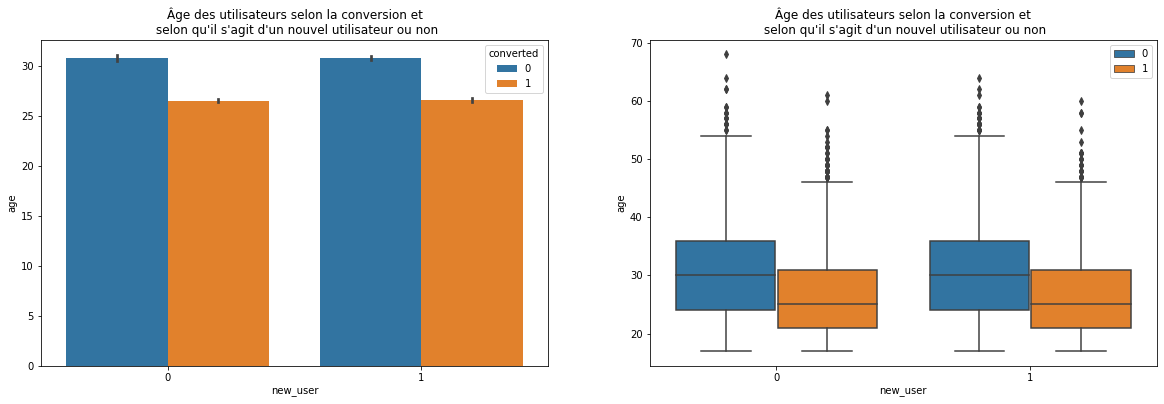

In [57]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.barplot(data=conversion_sample_df, x="new_user", y="age", hue="converted")
plt.title("Âge des utilisateurs selon la conversion et\n selon qu'il s'agit d'un nouvel utilisateur ou non")
plt.subplot(122)
sns.boxplot(data=conversion_sample_df, x="new_user", y="age", hue="converted")
plt.legend(loc='upper right')
plt.title("Âge des utilisateurs selon la conversion et\n selon qu'il s'agit d'un nouvel utilisateur ou non")
plt.show()

* Comme pour la source, il semble impossible de mettre un âge sur une personne consultant le site simplement en regardant si elle a déjà fréquenté le site par le passé
* Là aussi, la distribution de l'âge est moins dispersée pour les utilisateurs effectuant un achat, anciens ou nouveaux utilisateurs. Nous retrouvons 50% des individus qui convertissent dans la tranche d'âge 21-31 ans.

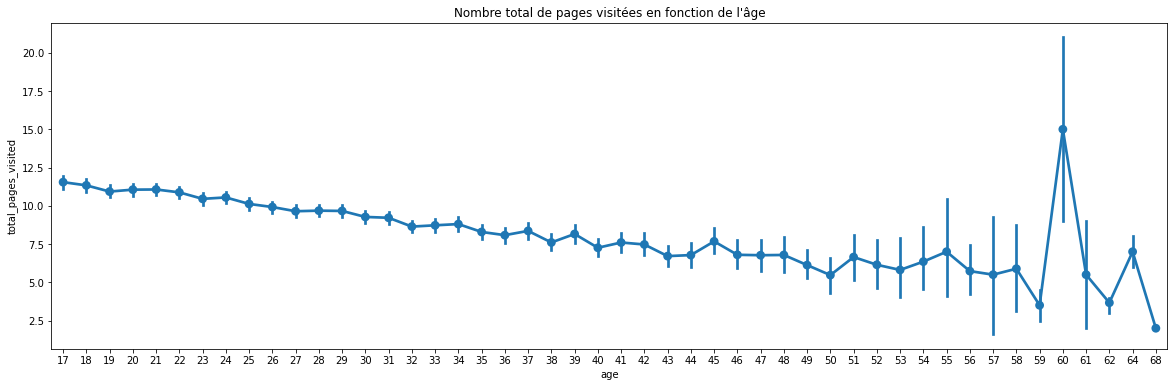

In [58]:
plt.figure(figsize=(20,6))
sns.pointplot(data=conversion_sample_df, y="total_pages_visited", x="age", kind="line")
plt.title("Nombre total de pages visitées en fonction de l'âge")
plt.show()

* Pour l'ensemble de l'échantillon, il semble y avoir une relation entre l'âge et le nombre total de pages visitées. Nous voyons une tendance linéaire : à mesure que l'âge des internautes augmente, le nombre de pages consultées diminue.
* A partir de l'âge de 53 ans, les intervalles de confiance pour les moyennes des âges sont plus larges, cela signifie qu'il y a de moins en moins d'individus ayant un âge supérieur à 53 ans dans notre échantillon. C'est bien ce que nous avions perçus lors de l'analyse de l'histogramme de l'âge.

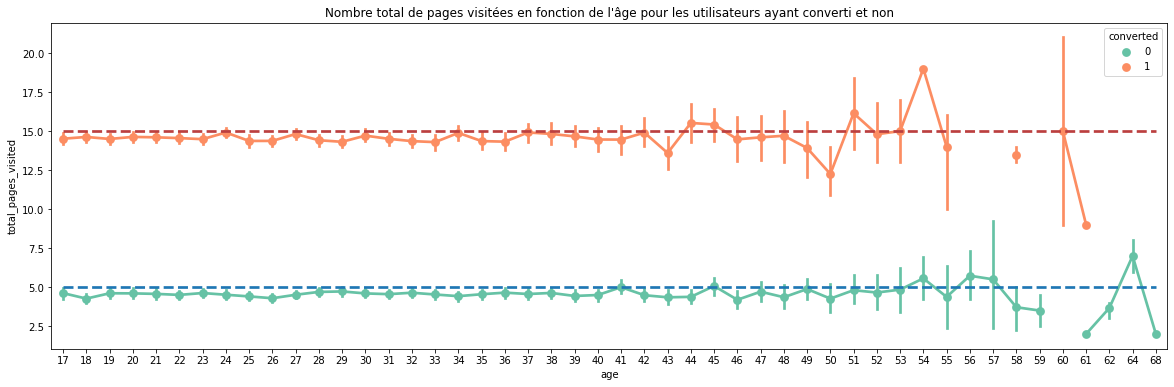

In [59]:
plt.figure(figsize=(20,6))

sns.pointplot(data=conversion_sample_df, y="total_pages_visited", x="age", kind="line", hue="converted", palette="Set2")
sns.pointplot(y=5*np.ones(conversion_sample_df.loc[:, "age"].unique().size), 
              x=conversion_sample_df.loc[:, "age"].unique(), 
              kind="line",
              markers='', 
              linestyles='--')
sns.pointplot(y=15*np.ones(conversion_sample_df.loc[:, "age"].unique().size), 
              x=conversion_sample_df.loc[:, "age"].unique(), 
              kind="line",
              markers='', 
              linestyles='--',
              color="#bb3f3f")

plt.title("Nombre total de pages visitées en fonction de l'âge pour les utilisateurs ayant converti et non")
plt.show()

* Quand nous observons l'évolution du nombre total de pages visitées en fonction de l'âge selon la conversion des utilisateurs, nous voyons que la tendance décroissante que nous avions déduit auparavant disparaît.
* Nous voyons que les utilisateurs n'effectuant pas d'achat consultent en moyenne 5 pages tandis que ceux qui convertissent parcourent en moyenne 14 pages.
* Nous voyons qu'il y a de moins en moins d'individus à partir de 43 ans pour les internautes qui convertissent, alors que pour les utilisateurs ne procédant à aucun achat, tout comme pour l'ensemble des individus, il faut attendre l'âge de 53 ans avant de voir les intervalles de confiance autour des moyennes s'élargir de plus en plus.

### A ce stade de l'analyse

* Nous pensons que plus le nombre de pages visitées augmente, plus l'utilisateur est susceptible d'effectuer un achat
* Passé un certain âge, il est peu problable que l'individu convertisse.
* Si l'internaute a déjà visité le site auparavant, il est plus enclin à procéder à un achat.
* Nous croyons que le pays d'où s'est connecté l'utilisateur et la source qui l'a mené à consulter le site n'ont pas d'influence sur la décision d'acheter.

# MACHINE LEARNING

* Pour la suite de l'analyse, nous allons appeler la classe 0 de la variable converted la classe négative, et la classe 1 sera désignée comme la classe positive.

In [60]:
X = conversion_sample_df.drop("converted", axis=1)
y = conversion_sample_df["converted"]

In [61]:
X.head()

,country,age,new_user,source,total_pages_visited
10688,US,25,1,Seo,3
26559,US,26,1,Seo,3
107148,US,34,1,Ads,7
291599,US,34,0,Direct,7
291271,China,17,1,Seo,2


In [62]:
y.head()

10688     0
26559     0
107148    0
291599    0
291271    0
Name: converted, dtype: int64

## Preprocessing

### Dummyfication

* Les variables catégorielles __country__ et __source__ sont dummyfiées.

In [63]:
X_dummyfied = pd.get_dummies(X, drop_first=True)

In [64]:
X_dummyfied.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
10688,25,1,3,0,0,1,0,1
26559,26,1,3,0,0,1,0,1
107148,34,1,7,0,0,1,0,0
291599,34,0,7,0,0,1,1,0
291271,17,1,2,0,0,0,0,1


* Nous séparons nos données en données d'apprentissage et données de test avant de normaliser les variables quantitatives __age__ et __total_pages_visited__.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummyfied, y, test_size=.2, random_state=42)

### Normalisation

In [66]:
from sklearn.preprocessing import StandardScaler

conversion_scaler = StandardScaler()

features_train_scaled = conversion_scaler.fit_transform(X_train.loc[:, ["age", "total_pages_visited"]])
X_train["age"] = features_train_scaled[:,0]
X_train["total_pages_visited"] = features_train_scaled[:,1]

In [67]:
X_train.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
176746,1.433346,1,-1.407798,0,0,0,0,1
256498,0.043965,1,-1.243031,0,0,1,0,1
19066,-0.461264,1,-1.407798,0,0,1,0,0
287416,-0.334957,0,-1.243031,0,1,0,0,1
219070,0.296580,0,0.898937,0,1,0,0,1


In [68]:
features_test_scaled = conversion_scaler.transform(X_test.loc[:, ["age", "total_pages_visited"]])
X_test["age"] = features_test_scaled[:,0]
X_test["total_pages_visited"] = features_test_scaled[:,1]

In [69]:
X_test.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
134539,0.170273,1,-1.243031,0,0,0,0,1
98936,-0.334957,0,-1.243031,0,0,1,0,1
279249,-0.840186,1,-0.583964,0,0,1,0,0
307916,0.422887,0,0.075103,0,0,1,1,0
265991,0.549195,0,0.239870,0,0,1,0,1


## Régression logistique

In [70]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
print("Logistic Regression score on training set :", log_reg.score(X_train, y_train))
print("Logistic Regression score on testing set :", log_reg.score(X_test, y_test))

Logistic Regression score on training set : 0.9406177227601422
Logistic Regression score on testing set : 0.932843137254902


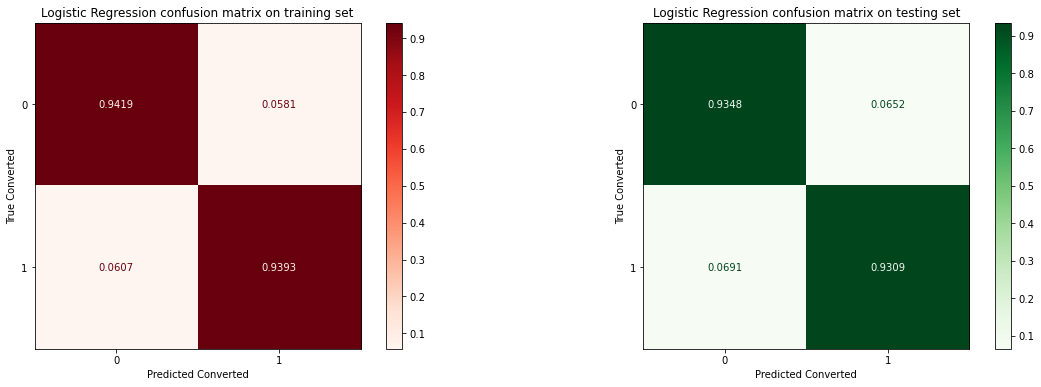

In [72]:
from sklearn.metrics import plot_confusion_matrix

fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Logistic Regression confusion matrix on training set")
axs[0].set_xlabel("Predicted Converted")
axs[0].set_ylabel("True Converted")
plot_confusion_matrix(log_reg, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Logistic Regression confusion matrix on testing set")
axs[1].set_xlabel("Predicted Converted")
axs[1].set_ylabel("True Converted")
plt.show()

* Sur les données d'apprentissage, notre modèle de régression logistique reconnaît 94.19% des individus de la classe négative (classe 0) et 93.93% de la classe positive (classe 1).
* Sur les données de test, le modèle prédit la bonne classe d'appartenance pour 93.48% des individus de la classe négative et 93.09% des utilisateurs de la classe positive.

In [122]:
from sklearn.metrics import classification_report

print("Classification metrics on training set")
print(classification_report(y_train, log_reg.predict(X_train)))
print()
print("Classification metrics on testing set")
print(classification_report(y_test, log_reg.predict(X_test)))

Classification metrics on training set
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8160
           1       0.94      0.94      0.94      8158

    accuracy                           0.94     16318
   macro avg       0.94      0.94      0.94     16318
weighted avg       0.94      0.94      0.94     16318


Classification metrics on testing set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2040
           1       0.93      0.93      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Nous obtenons effectivement de bons résultats : le f1-score de la classe positive est de 0.94 pour les données d'apprentissage, et 93% pour les données de test.
* Plus précisément, sur nos données de test, le modèle effectue 93% de prédictions correctes sur la classe positive, et sur tous les individus de la classe positive, il parvient à en reconnaître 93%.

In [74]:
coefficient_ranking = pd.DataFrame(
    data=log_reg.coef_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Coefficient"])
coefficient_ranking

,Coefficient
age,-0.565913
new_user,-1.638351
total_pages_visited,4.564573
country_Germany,3.481312
country_UK,3.419278
country_US,3.128028
source_Direct,0.019443
source_Seo,0.157798


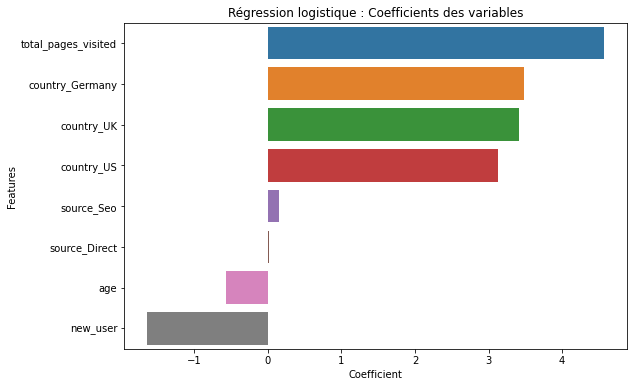

In [118]:
coefficient_ranking = coefficient_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=coefficient_ranking, x="Coefficient", y=coefficient_ranking.index)
plt.ylabel("Features")
plt.title("Régression logistique : Coefficients des variables")
plt.show()

* Sans surprise, le coefficient le plus grand est celui de la variable correspondant au nombre de pages visitées.
* La variable __new_user__ joue un rôle dans la conversion d'un individu (coefficient supérieur à 1 en valeur absolue).
* Cependant, nous n'avions pas anticipé la grande influence du pays dans la prise de décision d'achat : les coefficients des trois pays (Allemagne, Royaume-Uni, Etats-Unis) sont supérieurs à 3.

## Sélection des variables

* Effectuons des tests statistiques univariées pour voir quelles sont nos meilleurs features. 

In [76]:
from sklearn.feature_selection import chi2

chi2_score, p_value = chi2(X_dummyfied, y)
chi2_score, p_value = chi2_score.reshape(-1, 1), p_value.reshape(-1, 1)

feature_selection = pd.DataFrame(
    data=np.concatenate([chi2_score, p_value], axis=1), 
    index=X_dummyfied.columns, 
    columns=["Chi2 Score", "P-value"])
feature_selection

,Chi2 Score,P-value
age,3217.372274,0.000000e+00
new_user,1656.589166,0.000000e+00
total_pages_visited,53319.408437,0.000000e+00
country_Germany,117.001204,2.868933e-27
country_UK,244.217613,4.732713e-55
country_US,94.945472,1.957024e-22
source_Direct,22.239825,2.406306e-06
source_Seo,2.061853,1.510264e-01


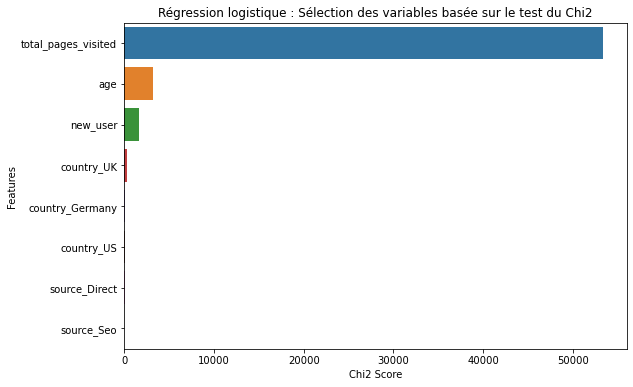

In [119]:
feature_selection = feature_selection.sort_values(by="Chi2 Score", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=feature_selection, x="Chi2 Score", y=feature_selection.index)
plt.ylabel("Features")
plt.title("Régression logistique : Sélection des variables basée sur le test du Chi2")
plt.show()

* Hormis la variable __source_Seo__, toutes les variables sont significatives à un niveau de confiance standard de 95%.
* En regardant de plus près, nous voyons nettement que les variables les plus significatives sont __total_pages_visited__, __age__ et __new_user__. Cela confirme les impressions que nous avions formulé à l'issue de la partie DataViz.
* Nous pouvons tout de même relever la très forte importance de la variable dénombrant le nombre de pages visitées par rapport aux variables indiquant l'âge de l'utilisateur et identifiant l'internaute comme un ancien ou un nouvel utilisateur.

## Arbre de décision

In [78]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth=5)
tree_classifier.fit(X_train, y_train)
tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [120]:
print("Tree Decision score on training set :", tree_classifier.score(X_train, y_train))
print("Tree Decision score on testing set :", tree_classifier.score(X_test, y_test))

Tree Decision score on training set : 0.931915675940679
Tree Decision score on testing set : 0.9262254901960785


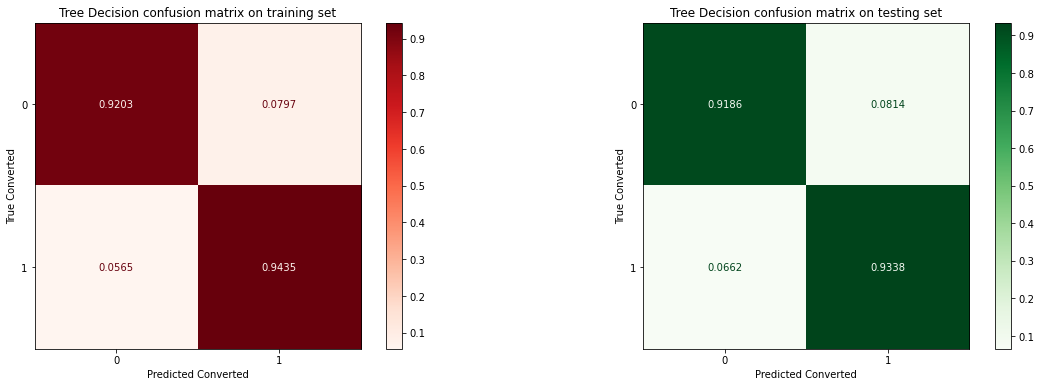

In [123]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(tree_classifier, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Tree Decision confusion matrix on training set")
axs[0].set_xlabel("Predicted Converted")
axs[0].set_ylabel("True Converted")
plot_confusion_matrix(tree_classifier, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Tree Decision confusion matrix on testing set")
axs[1].set_xlabel("Predicted Converted")
axs[1].set_ylabel("True Converted")
plt.show()

* Sur les données d'apprentissage, notre modèle d'arbre de décision prédit la bonne classe pour 92.03% des individus de la classe négative (classe 0) et 94.35% des samples de la classe positive (classe 1).
* Sur les données de test, le modèle identifie correctement 91.86% des individus de la classe négative et 93.38% des utilisateurs de la classe positive.

In [81]:
print("Tree Decision : classification metrics on training set")
print(classification_report(y_train, tree_classifier.predict(X_train)))
print()
print("Tree Decision : classification metrics on testing set")
print(classification_report(y_test, tree_classifier.predict(X_test)))

Tree Decision : classification metrics on training set
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8160
           1       0.92      0.94      0.93      8158

    accuracy                           0.93     16318
   macro avg       0.93      0.93      0.93     16318
weighted avg       0.93      0.93      0.93     16318


Tree Decision : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2040
           1       0.92      0.93      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Les résultats sont bons : le f1-score de la classe positive est de 0.93 pour les données d'apprentissage comme pour les données de test.
* En particulier, sur nos données de test, le modèle réalise 92% de prédictions correctes sur la classe positive, et il réussit à reconnaître 93% sur l'ensemble des individus de la classe positive.

In [82]:
feature_importance = pd.DataFrame(
    data=tree_classifier.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance

,Score
age,0.011972
new_user,0.029801
total_pages_visited,0.956990
country_Germany,0.000000
country_UK,0.000662
country_US,0.000575
source_Direct,0.000000
source_Seo,0.000000


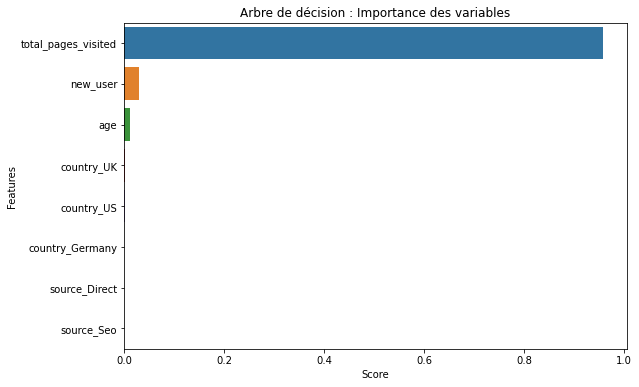

In [83]:
feature_importance = feature_importance.sort_values(by="Score", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=feature_importance, x="Score", y=feature_importance.index)
plt.ylabel("Features")
plt.title("Arbre de décision : Importance des variables")
plt.show()

* Le score de la variable __total_pages_visited__ est bien supérieur aux scores des autres variables. Cela confirme le rôle prépondérant de cette variable que nous avions observé dans la régression logistique. 

## Forêt aléatoire

* Analysons les résultats obtenus après application d'une forêt aléatoire composée de 50 arbres de décisions.

In [84]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=50, max_depth=5)
rand_forest.fit(X_train, y_train)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [85]:
print("Random forest score on training set :", rand_forest.score(X_train, y_train))
print("Random forest score on testing set :", rand_forest.score(X_test, y_test))

Random forest score on training set : 0.9335090084569188
Random forest score on testing set : 0.9274509803921569


* Regardons ce que cela donne avec une forêt aléatoire de 10 arbres.

In [86]:
rand_forest_10 = RandomForestClassifier(n_estimators=10, max_depth=5)
rand_forest_10.fit(X_train, y_train)
rand_forest_10.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
print("Random forest of 10 trees score on training set :", rand_forest_10.score(X_train, y_train))
print("Random forest of 10 trees score on testing set :", rand_forest_10.score(X_test, y_test))

Random forest of 10 trees score on training set : 0.9286677288883441
Random forest of 10 trees score on testing set : 0.9235294117647059


Même si le score est élevé, le précédent modèle à 50 arbres reste meilleur si nous tenons compte uniquement du score.
Analysons la matrice de confusion correspondant à ce modèle.

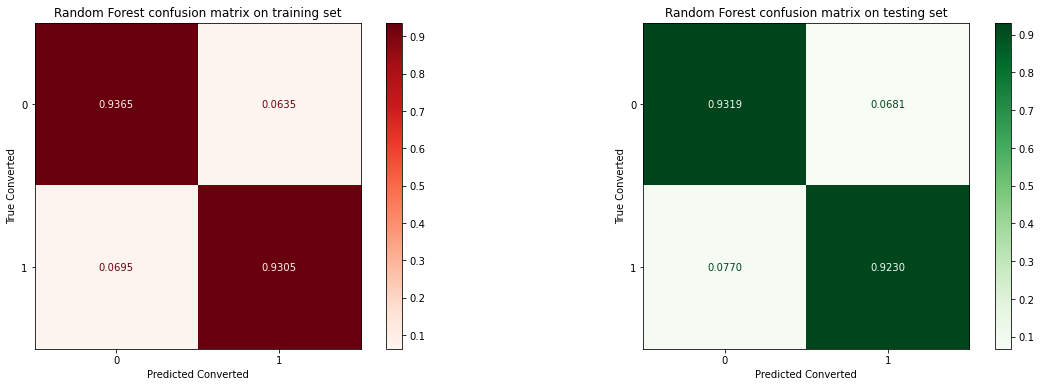

In [125]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(rand_forest, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Random Forest confusion matrix on training set")
axs[0].set_xlabel("Predicted Converted")
axs[0].set_ylabel("True Converted")
plot_confusion_matrix(rand_forest, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Random Forest confusion matrix on testing set")
axs[1].set_xlabel("Predicted Converted")
axs[1].set_ylabel("True Converted")
plt.show()

* Sur les données d'apprentissage, notre modèle de forêt aléatoire prédit la bonne classe pour 93.65% des individus de la classe négative (classe 0) et 93.05% des samples de la classe positive (classe 1).
* Sur les données de test, le modèle identifie correctement 93.19% des individus de la classe négative et 92.30% des utilisateurs de la classe positive.

In [89]:
print("Random forest : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=rand_forest.predict(X_train)))
print()
print("Random forest : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=rand_forest.predict(X_test)))

Random forest : classification metrics on training set
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8160
           1       0.94      0.93      0.93      8158

    accuracy                           0.93     16318
   macro avg       0.93      0.93      0.93     16318
weighted avg       0.93      0.93      0.93     16318


Random forest : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2040
           1       0.93      0.92      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Nous obtenons un f1-score de 0.93 pour la classe positive sur les données d'apprentissage et  sur les données de test.
* Pour être plus précis, sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 93%, et sur l'ensemble des individus labellisés comme appartenant à la classe positive, le modèle a reconnu 92% d'entre eux.

In [90]:
feature_importance_rand_forest = pd.DataFrame(
    data=rand_forest.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance_rand_forest

,Score
age,0.043329
new_user,0.108939
total_pages_visited,0.803367
country_Germany,0.008627
country_UK,0.016582
country_US,0.017721
source_Direct,0.000924
source_Seo,0.000511


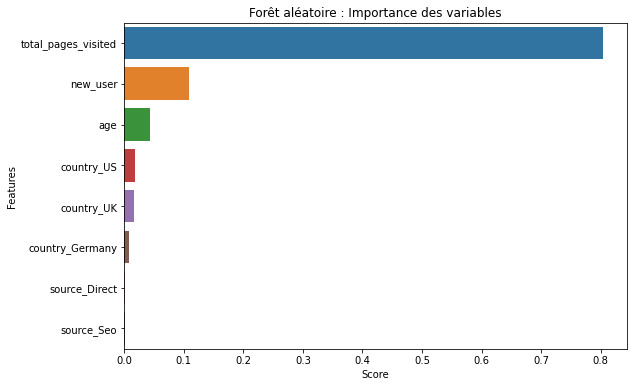

In [126]:
feature_importance_rand_forest = feature_importance_rand_forest.sort_values(by="Score", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=feature_importance_rand_forest, x="Score", y=feature_importance_rand_forest.index)
plt.ylabel("Features")
plt.title("Forêt aléatoire : Importance des variables")
plt.show()

* En comparaison avec le précédent modèle, l'arbre de décision, nous obtenons en aggrégeant 50 arbres de décision une plus grande importance des variables __new_user__ et __age__ (le score de __new_user__ dépasse 0.1). 
* A l'instar du modèle à un arbre, la variable répertoriant le nombre de pages visitées par les utilisateurs reste très importante par rapport aux autres features (score supérieur à 0.7).

## Recherche des meilleurs hyperparamètres

### Régression logistique

In [127]:
from sklearn.model_selection import GridSearchCV

log_reg_estimator = LogisticRegression()
params = {'C' : [0.1, 0.5, 1, 5, 10, 20, 35, 50]}

log_reg_grid = GridSearchCV(estimator=log_reg_estimator, param_grid=params, cv=4, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
log_reg_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'C': [0.1, 0.5, 1, 5, 10, 20, 35, 50]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [128]:
log_reg_grid.best_params_

{'C': 20}

* Le meilleur modèle de régression logistique trouvé est celui avec un terme de pénalité égal à 20.

In [129]:
print("Best Logistic Regression score on training set", log_reg_grid.best_estimator_.score(X_train, y_train))
print("Best Logistic Regression score on testing set", log_reg_grid.best_estimator_.score(X_test, y_test))

Best Logistic Regression score on training set 0.9410466968991298
Best Logistic Regression score on testing set 0.9323529411764706


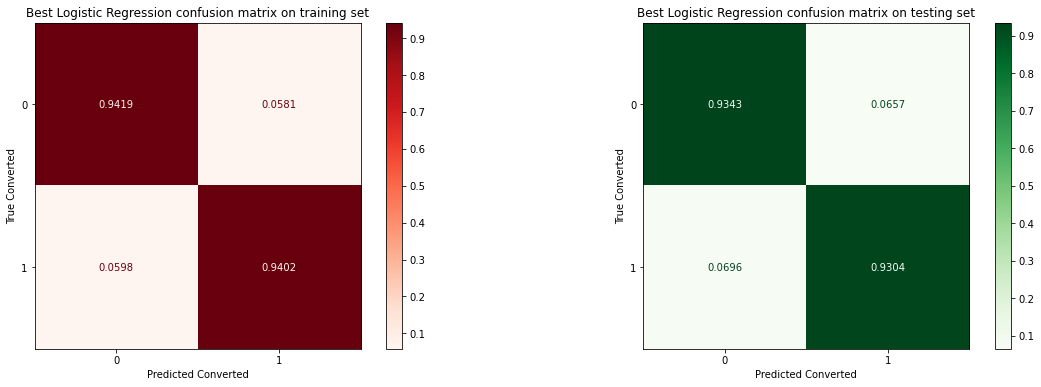

In [130]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg_grid, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Best Logistic Regression confusion matrix on training set")
axs[0].set_xlabel("Predicted Converted")
axs[0].set_ylabel("True Converted")
plot_confusion_matrix(log_reg_grid, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Best Logistic Regression confusion matrix on testing set")
axs[1].set_xlabel("Predicted Converted")
axs[1].set_ylabel("True Converted")
plt.show()

* Sur les données d'apprentissage, ce modèle de régression logistique prédit la bonne classe pour 94.19% des individus de la classe négative et 94.02% des samples de la classe positive.
* Sur les données de test, le modèle identifie correctement 93.43% des individus de la classe négative et 93.04% des utilisateurs de la classe positive.

In [131]:
print("Best Logistic Regression : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=log_reg_grid.best_estimator_.predict(X_train)))
print()
print("Best Logistic Regression : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=log_reg_grid.best_estimator_.predict(X_test)))

Best Logistic Regression : classification metrics on training set
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8160
           1       0.94      0.94      0.94      8158

    accuracy                           0.94     16318
   macro avg       0.94      0.94      0.94     16318
weighted avg       0.94      0.94      0.94     16318


Best Logistic Regression : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2040
           1       0.93      0.93      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Le f1-score de la classe positive est de 0.94 pour les données d'apprentissage et de 0.93 pour les données de test.
* En particulier, sur nos données de test, ce modèle optimal réalise 93% de prédictions correctes sur la classe positive, et il réussit à reconnaître 93% sur l'ensemble des individus de la classe positive. 

In [97]:
coefficient_ranking_log_reg_grid = pd.DataFrame(
    data=log_reg_grid.best_estimator_.coef_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Coefficient"])
coefficient_ranking_log_reg_grid

,Coefficient
age,-0.573286
new_user,-1.664677
total_pages_visited,4.632247
country_Germany,3.881405
country_UK,3.770004
country_US,3.462697
source_Direct,0.020006
source_Seo,0.162228


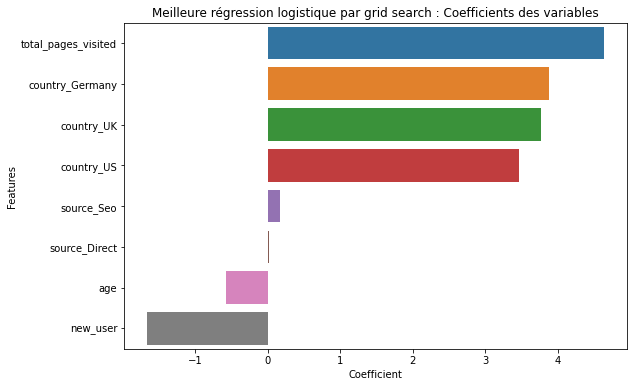

In [98]:
coefficient_ranking_log_reg_grid = coefficient_ranking_log_reg_grid.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=coefficient_ranking_log_reg_grid, x="Coefficient", y=coefficient_ranking_log_reg_grid.index)
plt.ylabel("Features")
plt.title("Meilleure régression logistique par grid search : Coefficients des variables")
plt.show()

### Arbre de décision

In [99]:
decision_tree_estimator = DecisionTreeClassifier()
params = {'max_depth' : np.arange(2, 15)}

tree_classifier_grid = GridSearchCV(estimator=decision_tree_estimator, param_grid=params, cv=4, n_jobs=-1)
tree_classifier_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [132]:
tree_classifier_grid.best_params_

{'max_depth': 7}

* Le modèle d'arbre de décision que nous avons vu plus haut a une profondeur maximal de 5.

In [101]:
print("Best Tree Decision score on training set :", tree_classifier_grid.best_estimator_.score(X_train, y_train))
print("Best Tree Decision score on testing set :", tree_classifier_grid.best_estimator_.score(X_test, y_test))

Best Tree Decision score on training set : 0.9386566981247702
Best Tree Decision score on testing set : 0.9254901960784314


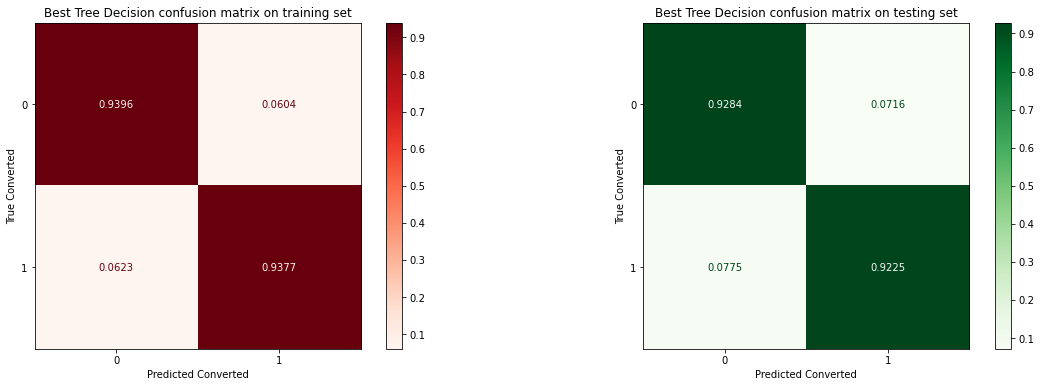

In [133]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(tree_classifier_grid, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Best Tree Decision confusion matrix on training set")
axs[0].set_ylabel("True Converted")
axs[0].set_xlabel("Predicted Converted")
plot_confusion_matrix(tree_classifier_grid, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Best Tree Decision confusion matrix on testing set")
axs[1].set_xlabel("Predicted Converted")
axs[1].set_ylabel("True Converted")
plt.show()

* Sur les données d'apprentissage, ce modèle d'arbre de décision prédit la bonne classe pour 93.96% des individus de la classe négative et 93.77% des samples de la classe positive.
* Sur les données de test, le modèle identifie correctement 92.84% des individus de la classe négative et 92.25% des utilisateurs de la classe positive.

In [103]:
print("Best Tree Decision on training set")
print(classification_report(y_true=y_train, y_pred=tree_classifier_grid.best_estimator_.predict(X_train)))
print()
print("Best Tree Decision on testing set")
print(classification_report(y_true=y_test, y_pred=tree_classifier_grid.best_estimator_.predict(X_test)))

Best Tree Decision on training set
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8160
           1       0.94      0.94      0.94      8158

    accuracy                           0.94     16318
   macro avg       0.94      0.94      0.94     16318
weighted avg       0.94      0.94      0.94     16318


Best Tree Decision on testing set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2040
           1       0.93      0.92      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Le f1-score de la classe positive est de 0.94 pour les données d'apprentissage et de 0.93 pour les données de test.
* En particulier, sur nos données de test, ce modèle optimal réalise 93% de prédictions correctes sur la classe positive, et il réussit à reconnaître 92% sur l'ensemble des individus de la classe positive.

In [104]:
feature_importance_tree_classifier_grid = pd.DataFrame(
    data=tree_classifier_grid.best_estimator_.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance_tree_classifier_grid

,Score
age,0.017954
new_user,0.029747
total_pages_visited,0.939627
country_Germany,0.001634
country_UK,0.004900
country_US,0.004743
source_Direct,0.000910
source_Seo,0.000486


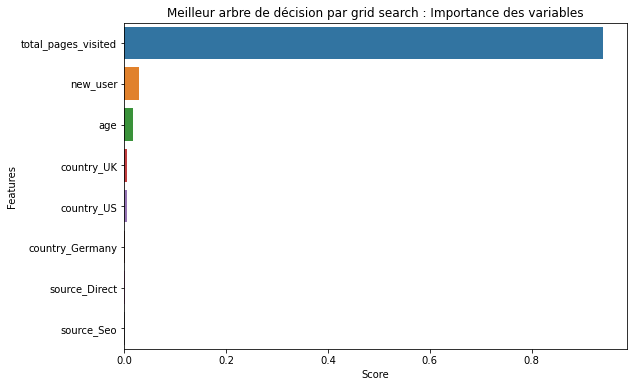

In [105]:
feature_importance_tree_classifier_grid = feature_importance_tree_classifier_grid.sort_values(by="Score", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=feature_importance_tree_classifier_grid, x="Score", y=feature_importance_tree_classifier_grid.index)
plt.ylabel("Features")
plt.title("Meilleur arbre de décision par grid search : Importance des variables")
plt.show()

* Les conclusions que nous avions énoncées pour notre arbre de décision tiennent toujours.

### Forêt Aléatoire

In [106]:
random_forest_estimator = RandomForestClassifier()
params = {"n_estimators": range(25, 75, 5),
          "max_depth" : range(3, 11)
          }

rand_forest_grid = GridSearchCV(
    estimator = random_forest_estimator, 
    param_grid = params, 
    n_jobs=-1,
    cv=4
)

rand_forest_grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': range(25, 75, 5)})

In [134]:
rand_forest_grid.best_params_

{'max_depth': 8, 'n_estimators': 45}

* Notre modèle de forêt aléatoire comporte 50 arbres et une profondeur maximale de 5.

In [108]:
print("Best Random Forest score on training set", rand_forest_grid.best_estimator_.score(X_train, y_train))
print("Best Random Forest score on testing set", rand_forest_grid.best_estimator_.score(X_test, y_test))

Best Random Forest score on training set 0.9459492584875597
Best Random Forest score on testing set 0.9316176470588236


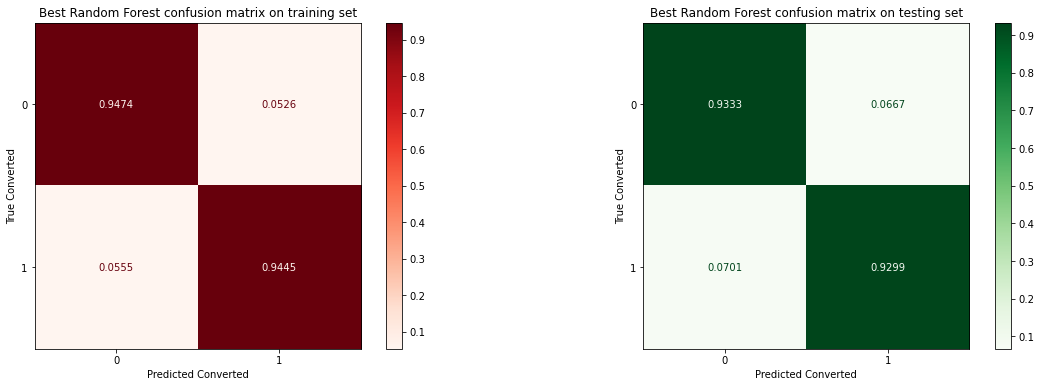

In [135]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(rand_forest_grid, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Best Random Forest confusion matrix on training set")
axs[0].set_ylabel("True Converted")
axs[0].set_xlabel("Predicted Converted")
plot_confusion_matrix(rand_forest_grid, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Best Random Forest confusion matrix on testing set")
axs[1].set_ylabel("True Converted")
axs[1].set_xlabel("Predicted Converted")
plt.show()

* Sur les données d'apprentissage, le modèle optimal de forêt aléatoire prédit la bonne classe pour 94.74% des individus de la classe négative et 94.45% des samples de la classe positive.
* Sur les données de test, le modèle optimal identifie correctement 93.33% des individus de la classe négative et 92.99% des utilisateurs de la classe positive.

In [110]:
print("Best Random Forest : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=rand_forest_grid.best_estimator_.predict(X_train)))
print()
print("Best Random Forest : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=rand_forest_grid.best_estimator_.predict(X_test)))

Best Random Forest : classification metrics on training set
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8160
           1       0.95      0.94      0.95      8158

    accuracy                           0.95     16318
   macro avg       0.95      0.95      0.95     16318
weighted avg       0.95      0.95      0.95     16318


Best Random Forest : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2040
           1       0.93      0.93      0.93      2040

    accuracy                           0.93      4080
   macro avg       0.93      0.93      0.93      4080
weighted avg       0.93      0.93      0.93      4080



* Nous obtenons un f1-score de 0.95 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.93 sur les données de test.
* Sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 93%, et sur l'ensemble des individus labellisés comme appartenant à la classe positive, le modèle a reconnu 93% d'entre eux.

In [111]:
feature_importance_rand_forest_grid = pd.DataFrame(
    data=rand_forest_grid.best_estimator_.feature_importances_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Score"])
feature_importance_rand_forest_grid

,Score
age,0.042930
new_user,0.103824
total_pages_visited,0.804461
country_Germany,0.010639
country_UK,0.017699
country_US,0.017019
source_Direct,0.001853
source_Seo,0.001575


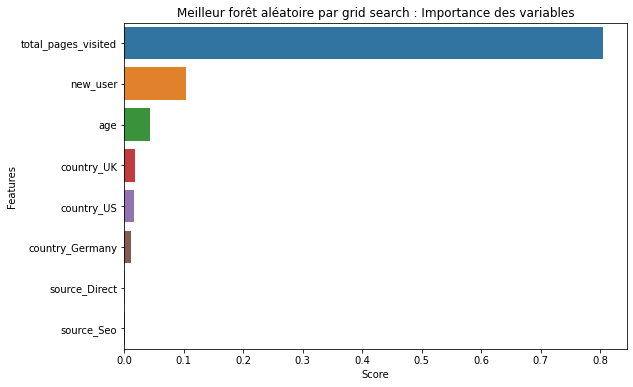

In [136]:
feature_importance_rand_forest_grid = feature_importance_rand_forest_grid.sort_values(by="Score", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=feature_importance_rand_forest_grid, x="Score", y=feature_importance_rand_forest_grid.index)
plt.ylabel("Features")
plt.title("Meilleur forêt aléatoire par grid search : Importance des variables")
plt.show()

* La variable __total_pages_visited__ a toujours ce rôle prépondérant que nous avions repéré auparavant.

## Comparaison entre les modèles

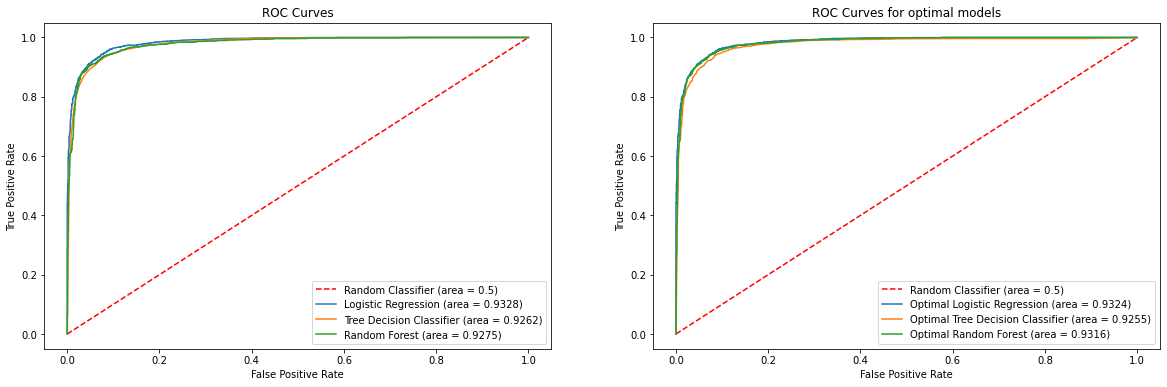

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve

# Régression logistique
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

# Arbre de décision
tree_classifier_roc_auc = roc_auc_score(y_test, tree_classifier.predict(X_test))
fpr_tree_classif, tpr_tree_classif, thresholds = roc_curve(y_test, tree_classifier.predict_proba(X_test)[:,1])

# Forêt aléatoire
rand_forest_roc_auc = roc_auc_score(y_test, rand_forest.predict(X_test))
fpr_rand_forest, tpr_rand_forest, thresholds = roc_curve(y_test, rand_forest.predict_proba(X_test)[:,1])

# Régression logistique optimal
log_reg_grid_roc_auc = roc_auc_score(y_test, log_reg_grid.predict(X_test))
fpr_log_reg_grid, tpr_log_reg_grid, thresholds = roc_curve(y_test, log_reg_grid.predict_proba(X_test)[:,1])

# Arbre de décision optimal
tree_classifier_grid_roc_auc = roc_auc_score(y_test, tree_classifier_grid.predict(X_test))
fpr_tree_classif_grid, tpr_tree_classif_grid, thresholds = roc_curve(y_test, tree_classifier_grid.predict_proba(X_test)[:,1])

# Forêt aléatoire optimal
rand_forest_grid_roc_auc = roc_auc_score(y_test, rand_forest_grid.predict(X_test))
fpr_rand_forest_grid, tpr_rand_forest_grid, thresholds = roc_curve(y_test, rand_forest_grid.predict_proba(X_test)[:,1])

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('ROC Curves')
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier (area = 0.5)" )
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % log_reg_roc_auc)
plt.plot(fpr_tree_classif, tpr_tree_classif, label='Tree Decision Classifier (area = %0.4f)' % tree_classifier_roc_auc)
plt.plot(fpr_rand_forest, tpr_rand_forest, label='Random Forest (area = %0.4f)' % rand_forest_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.subplot(122)
plt.title('ROC Curves for optimal models')
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier (area = 0.5)" )
plt.plot(fpr, tpr, label='Optimal Logistic Regression (area = %0.4f)' % log_reg_grid_roc_auc)
plt.plot(fpr_tree_classif_grid, tpr_tree_classif_grid, label='Optimal Tree Decision Classifier (area = %0.4f)' % tree_classifier_grid_roc_auc)
plt.plot(fpr_rand_forest_grid, tpr_rand_forest_grid, label='Optimal Random Forest (area = %0.4f)' % rand_forest_grid_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [138]:
from sklearn.metrics import recall_score, precision_score

model_comparison = pd.DataFrame(index=["Logistic Regression", "Tree Decision Classifier", "Random Forest", 
                                       "Optimal Logistic Regression", "Optimal Tree Decision Classifier", 
                                       "Optimal Random Forest"])
model_comparison["Score"] = [log_reg.score(X_test, y_test), tree_classifier.score(X_test, y_test), 
                             rand_forest.score(X_test, y_test), log_reg_grid.score(X_test, y_test),
                             tree_classifier_grid.score(X_test, y_test), rand_forest_grid.score(X_test, y_test)]
model_comparison["Precision"] = [
    precision_score(y_test, log_reg.predict(X_test)),
    precision_score(y_test, tree_classifier.predict(X_test)),
    precision_score(y_test, rand_forest.predict(X_test)),
    precision_score(y_test, log_reg_grid.predict(X_test)),
    precision_score(y_test, tree_classifier_grid.predict(X_test)),
    precision_score(y_test, rand_forest_grid.predict(X_test))
]
model_comparison["Recall"] = [
    recall_score(y_test, log_reg.predict(X_test)),
    recall_score(y_test, tree_classifier.predict(X_test)),
    recall_score(y_test, rand_forest.predict(X_test)),
    recall_score(y_test, log_reg_grid.predict(X_test)),
    recall_score(y_test, tree_classifier_grid.predict(X_test)),
    recall_score(y_test, rand_forest_grid.predict(X_test))
]

In [139]:
model_comparison

,Score,Precision,Recall
Logistic Regression,0.932843,0.934547,0.930882
Tree Decision Classifier,0.926225,0.919845,0.933824
Random Forest,0.927451,0.931256,0.923039
Optimal Logistic Regression,0.932353,0.934055,0.930392
Optimal Tree Decision Classifier,0.925490,0.928008,0.922549
Optimal Random Forest,0.931618,0.933104,0.929902


* Au vu des courbes ROC, des scores d'accuracy, des scores de précision de rappel, le modèle de régression logistique est le meilleur. C'est donc celui-ci que nous allons retenir pour effectuer nos prédictions pour les nouveaux individus qui fréquenteront le site. 

# Conclusion



* Au terme de la partie DataViz, nous avions repéré le rôle que pouvaient jouer trois données dans la propension d'un utilisateur à effectuer un achat :
    - le nombre total de pages visitées
    - l'âge de l'individu
    - le fait de savoir s'il s'agit d'un nouvel utilisateur ou d'une personne ayant déjà visité le site auparavant
* Dans la partie Machine Learning, au travers des différents modèles entraînés, nos intuitions furent confirmées par l'analyse des différents résultats. Nous avons surtout vu très grande importance du nombre de pages visitées dans la prise de décision. Viennent ensuite dans un moindre rôle (mais pas négligeable) l'information sur la première visite ou pas de l'utilisateur, puis son âge.
* Le modèle retenu nous permet de dire que plus le nombre de pages visitées augmente, plus la probabilité que l'utilisateur procède à un achat est grande. Par ailleurs, à une moindre mesure, si l'utilisateur visite pour la première fois le site, ou si l'utilisateur est âgé (l'âge moyen des utilisateurs qui converstissent est de 25 ans), il y a moins de chances pour qu'il effectue un achat.
* Nous recommandons donc que l'équipe en charge du site se concentre sur des fonctionnalités qui poussent l'utilisateur à consulter non seulement plus de pages, mais aussi à faire en sorte qu'il revienne le plus souvent. Se mettre au diapason des nouvelles tendances que suivent les jeunes entre 18 et 31 ans est aussi une piste à suivre.